# Musterlösung Praktikum 7

Für dieses Praktikum wird das Modul sympy benötigt. Dieses muss vorher gegebenenfalls über das Terminal installiert werden.

```
pip install sympy
```

Anschließend kann das Modul importiert werden.

Für die Darstellung wird zudem das Modul IPython.display verwendet.

In [1]:
from sympy import *
from IPython.display import display, Math, Latex
from sympy.physics.mechanics import dynamicsymbols, init_vprinting
init_vprinting(use_latex='mathjax')

In [2]:
# helper function for latex pretty printing
def display_latex_result(a, b=None):
  if b is None:
    res = "$${}$$".format(a)
  else:
    res = "$${} = {}$$".format(a, latex(b, mat_delim='('))
  display(Latex(res))

$\newcommand{\mbf}{\mathbf}$
$\newcommand{\mrm}{\mathrm}$
$\newcommand{\tcdegree}{{°}}$
$\newcommand{\unitms}{{\mathrm{\frac{m}{s}}}}$
$\newcommand{\unitrads}{{\mathrm{\frac{rad}{s}}}}$

Gegeben ist ein omnidirektionaler mobiler Roboter mit Mecanumantrieb. 
Die Mecanum-Räder sind am Roboter bezogen auf das Roboterkoordinatensystem nicht geneigt angebracht. Die Rollen innerhalb des Rades sind bezogen auf das Radkoordinatensystem um $45^\circ=\frac{\pi}{4}\mathrm{rad}$ geneigt angebracht ($\pm 45^\circ$ siehe Abbildung). Die Abbildung zeigt dabei die Rollen mit Bodenkontakt, die Orientierung der Rollen ist also schon gegenüber der Draufsicht auf das Rad gedreht.

<table><tr>
<td> 

$i$  | $\delta_i$  | $\alpha_i$                | $l_i$               |$\gamma_i$
:---:|:-----------:|:-------------------------:|:------------------:|:------------------:|
1    | $0°$ | $-\arctan(b/a)$           | $\sqrt{a^2 + b^2}$ |$+\frac{\pi}{4}$|
2    | $0°$ | $+\arctan(b/a)$           | $\sqrt{a^2 + b^2}$ |$-\frac{\pi}{4}$|
3    | $0°$ | $+180^\circ-\arctan(b/a)$ | $\sqrt{a^2 + b^2}$ |$+\frac{\pi}{4}$|
4    | $0°$ | $-180^\circ+\arctan(b/a)$ | $\sqrt{a^2 + b^2}$ |$-\frac{\pi}{4}$|

</td>
<td>
<figure>
<center>
<img width='400' src='https://fh-dortmund.sciebo.de/s/esxLNzGVvbZZEm5/download?path=%2F&files=mecanum12.png'/>
</figure>
</td>
<td>
<figure>
<center>
<img width='300' src='https://fh-dortmund.sciebo.de/s/esxLNzGVvbZZEm5/download?path=%2F&files=mecanum_wheel_lsg.png'/>
</figure>
</td>
</tr></table>    
    


## Aufgabe 7.1

Zeichnen Sie die Radkoordinatensysteme in die Grafik ein und tragen Sie zu jedem Radkoordinatensystem die dazugehörigen Parameter in die angegebene Tabelle ein.

## Aufgabe 7.2

Geben Sie die kinematische Gleichung der Rückwärtstransformation an.


Hinweis: Die Rückwärtstransformation berechnet die Radgeschwindigkeiten $\dot{\varphi}_1 \dots \dot{\varphi}_4$ aus den
vorgegebenen Geschwindigkeiten im Roboterkoordinatensystem $\dot{x}_\mathrm{R}, \dot{y}_\mathrm{R}, \dot{\theta}$.

Die Kinematik des Rades $i$ kann durch die nachfolgende Gleichung beschrieben werden:

$$
\dot{\varphi}_i = \frac{1}{r \cdot \cos(\gamma_i)}\begin{pmatrix} \cos(\delta_i + \gamma_i), & \sin(\delta_i + \gamma_i), & l_i  \sin(\delta_i + \gamma_i- \alpha_i)\end{pmatrix}
\begin{pmatrix} \dot{x}_\mathrm{R} \\ \dot{y}_\mathrm{R} \\ \dot{\theta} \\ \end{pmatrix}
$$ 

Es gilt: $\sin(x+y) = \sin x \cdot \cos y + \cos x \cdot \sin y$ ; $\sin(x-y) = \sin x \cdot \cos y - \cos x \cdot \sin y$ ; $\sin(\arctan x) = \frac{x}{\sqrt{x^2 + 1}}$ ; $\cos(\arctan x) = \frac{1}{\sqrt{x^2 + 1}}$  .

### Lösung:

<!--
<div class="alert alert-warning" role="alert">
-->
<div class="alert alert-block alert-warning">

!!! Anpassen !!!

Mit den Parametern des ersten Rades:

$
\dot{\varphi}_1 = \frac{1}{r}\begin{pmatrix} \cos\left(+45\tcdegree\right), & \sin\left(+45\tcdegree\right), & \sqrt{a^2 + b^2} \sin\left(+45\tcdegree + \arctan\left(\frac{b}{a}\right)\right)\end{pmatrix}
\begin{pmatrix} \dot{x}_\mrm{R} \\ \dot{y}_\mrm{R} \\ \dot{\theta} \\ \end{pmatrix}
$ 

$
\dot{\varphi}_1 = \frac{1}{r}\begin{pmatrix} \frac{1}{\sqrt{2}}, & \frac{1}{\sqrt{2}}, & \sqrt{a^2 + b^2}\left(\sin\left(+45\tcdegree\right) \cos\left(\arctan\left(\frac{b}{a}\right)\right) + \cos\left(+45\tcdegree\right) \sin\left(\arctan\left(\frac{b}{a}\right)\right) \right)\end{pmatrix}
\begin{pmatrix} \dot{x}_\mrm{R} \\ \dot{y}_\mrm{R} \\ \dot{\theta} \\ \end{pmatrix}
$

$
\dot{\varphi}_1 = \frac{1}{\sqrt{2}\; r}\begin{pmatrix} 1, & 1, & \sqrt{a^2 + b^2}\left(\frac{1}{\sqrt{\frac{b^2}{a^2} + 1}} + \frac{\frac{b}{a}}{\sqrt{\frac{b^2}{a^2} + 1}}\right)\end{pmatrix}
\begin{pmatrix} \dot{x}_\mrm{R} \\ \dot{y}_\mrm{R} \\ \dot{\theta} \\ \end{pmatrix}
$

$
\dot{\varphi}_1 = \frac{1}{\sqrt{2}\; r}\begin{pmatrix} 1, & 1, & (a + b)\end{pmatrix}
\begin{pmatrix} \dot{x}_\mrm{R} \\ \dot{y}_\mrm{R} \\ \dot{\theta} \\ \end{pmatrix}
$ 

Durch Einsetzen der Parameter der anderen Räder erhält man:

$
\frac{1}{\sqrt{2}\; r}\begin{pmatrix} 1, & -1, & -(a + b)\end{pmatrix}
\begin{pmatrix} \dot{x}_\mrm{R} \\ \dot{y}_\mrm{R} \\ \dot{\theta} \\ \end{pmatrix}
 = \dot{\varphi}_2
$

$
\frac{1}{\sqrt{2}\; r}\begin{pmatrix} 1, & 1, & -(a + b)\end{pmatrix}
\begin{pmatrix} \dot{x}_\mrm{R} \\ \dot{y}_\mrm{R} \\ \dot{\theta} \\ \end{pmatrix}
 = \dot{\varphi}_3
$

$
\frac{1}{\sqrt{2}\; r}\begin{pmatrix} 1, & -1, & (a + b)\end{pmatrix}
\begin{pmatrix} \dot{x}_\mrm{R} \\ \dot{y}_\mrm{R} \\ \dot{\theta} \\ \end{pmatrix}
 = \dot{\varphi}_4
$ 


Durch Zusammenführung der Gleichungen erhält man die Rücktransformation:

$
\left(\begin{array}{c}
\dot{\varphi}_{1} \\
\dot{\varphi}_{2} \\
\dot{\varphi}_{3} \\
\dot{\varphi}_{4} 
\end{array} \right) = 
\frac{1}{\sqrt{2}\;r}
\left(\begin{array}{rrr}
 1 & 1 &  (a+b) \\
 1 & -1 & -(a+b) \\
 1 & 1 & -(a+b) \\
 1 & -1 &  (a+b)
\end{array} \right)
\left(\begin{array}{c}
\dot{x}_\mrm{R}  \\
\dot{y}_\mrm{R}  \\
\dot{\theta}  
\end{array} \right) 
$

</div>

### Ergänzen Sie den nachstehenden Code um Ihre Rechnung zu überprüfen

In [3]:
def wheel_vel(r, gamma, delta, alpha, l):
      vel = Matrix([[cos(gamma + delta), sin(gamma + delta), l*sin(delta + gamma - alpha)]])
      vel = 1/(r*cos(gamma))*vel
      return vel;

# Definition der benötigten Symbole
r_i, alpha_i, gamma_i, delta_i, l_i = symbols('r_i alpha_i gamma_i delta_i l_i')
# Ausgabe der allgemeinen Gleichung
dot_phi = wheel_vel(r_i, gamma_i, delta_i, alpha_i, l_i)
display_latex_result('\\mathbf{\\dot{\\varphi}_i}', dot_phi)

# Einsetzen der Parameter des konkreten mobilen Roboters
r, a, b, = symbols('r a b', positive=True)
l = sqrt(a*a + b*b)
J = Matrix([[wheel_vel(r, pi/4,   0, -atan(a/b),      l)],
            [wheel_vel(r, -pi/4,  0,  atan(a/b),      l)],
            [wheel_vel(r, pi/4,  0,  pi - atan(a/b), l)],
            [wheel_vel(r, -pi/4,  0, -pi + atan(a/b), l)]])

display_latex_result('\\mathbf{J}', J)

# Vereinfachung der Matrix
J = simplify(J)
display_latex_result('\\mathbf{J}', J)

# Herausziehen eines gemeinsamen Faktors
fac = 1/r
Jf = J/fac
res = "$${} = {} \cdot {} \cdot {}$$".format('\\dot{\mathbf{\\varphi}} = \mathbf{J} \cdot \\dot{\mathbf{x}}_\mathrm{R}', latex(fac), latex(Jf, mat_delim='('), '\\dot{\mathbf{x}}_\mathrm{R}')
display(Latex(res))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

## Zusatzaufgabe Vorwärtskinematik
Geben Sie die kinematische Gleichung der Vorwärtskinematik an.
Hinweis: Die Vorwärtskinematik erhalten Sie durch Bildung der Pseudoinversen (Moore-Penrose-Inverse) von $\mathbf{J}$ (Methode der kleinsten Fehlerquadrate)

In [4]:
Jinv = ((J.T * J).inv(method="LU")) * J.T # Moore-Penrose-Inverse
display_latex_result('\\mathbf{J}^*', Jinv)

<IPython.core.display.Latex object>

wir ziehen wieder einen Faktor heraus

In [5]:
fac = r/4
Jfinv = Jinv/fac
res = "$${} = {} \cdot {}$$".format('\mathbf{J}^*', latex(fac), latex(Jfinv, mat_delim='('))
display(Latex(res))

<IPython.core.display.Latex object>

## Bahninterpolation

Der Roboter soll den im Weltkoordinatensystem abgebildeten Kurs von A nach C abfahren. Der Kurs besteht aus jeweils zwei
Geraden zwischen den Punkten $A$ = (1, 9), $B$ = (8, 2) und $C$ = (17, 2). Die Positionen der Punkte sind in m angegeben.

Der Roboter soll im Punkt $A$ mit der Orientierung $\theta = 180°$ starten, diese Orientierung bis $B$ beibehalten und in $C$  $\theta = 0°$ erreichen. 
$\theta$ soll linear zwischen den Punkten $B$ und $C$ interpoliert werden. Der Betrag der Lineargeschwindigkeit in Weltkoordinaten soll $|v_w|=\sqrt{\dot{x}_w^2+\dot{y}_w^2}=1\unitms$ betragen.

Die Radabstände des Roboters betragen $a = 0,2$m und $b = 0,3$m, der Radradius beträgt $r = 0,1$m der Geschwindigkeit $\dot{x}_\mathrm{R} =$ 1m/s abfahren. Der Roboter hat die Abmessungen von
$a =$ 0,2m und $b =$ 0,3m, sowie einen Radradius von $r =$ 0,1m.

Die nachfolgende Animation visualisiert die Bewegung des Roboters beim Abfahren des Kurses

<figure>
<center>
<img width='800' src='https://fh-dortmund.sciebo.de/s/esxLNzGVvbZZEm5/download?path=%2F&files=mecanum_rob.gif' />
</figure>

## Aufgabe 7.3

Welche Längen haben die einzelnen Kursabschnitte?

### Lösung:

<div class="alert alert-warning" role="alert">

$
s_\mrm{AB} = \sqrt{7^2 + 7^2}\mathrm{m} = \sqrt{2} \cdot 7\mathrm{m}= 9,9\mathrm{m}\, , \quad s_\mrm{BC} = 9\mathrm{m}
$

wobei $s_\mrm{AB}$ die Strecke zwischen den Punkten $A$ und $B$ ist und $s_\mrm{BC}$ die Strecke zwischen den Punkten $B$ und $C$ ist. 

</div>

## Aufgabe 7.4

Welche Zeit benötigt der Roboter für die einzelnen Kursabschnitte, wenn er mit der vorgegebenen Lineargeschwindigkeit den Kurs abfährt? Beschleunigungsvorgänge sollen nicht berücksichtigt werden.

### Lösung:

<div class="alert alert-warning" role="alert">
$
t_{AB}=\frac{s_{AB}}{|v_w|}=\sqrt{2}\cdot7s=9,9s,\:  t_{BC}=9s
    $

wobei $t_{AB}$ die Zeit ist, die der Roboter für die Strecke $s_{AB}$ benötigt. Es gilt $t_{AB} = t_{B} − t_{A}$.
$t_{B}$ und $t_{A}$ sind die absoluten Zeitpunkte in den Punkten $A$ und $B$. Analog gilt das Gleiche für $t_{BC}$.
</div>

## Aufgabe 7.5

Mit welchen Geschwindigkeiten in Weltkoordinaten $(\dot{x}_W,\dot{y}_W, \dot{\theta})$ bewegt sich der
Roboter jeweils auf den beiden Kursabschnitten?

### Lösung:

<div class="alert alert-warning" role="alert">
$
\newcommand{\bm}[1]{{\mathbf{#1}}}
\newcommand{\e}{{\,\mathrm{e}\,}}
\newcommand{\dd}{{\,\mathrm{d}}}
$

Die translatorische Bewegung eines Körpers in der Ebene kann durch
den Geschwindigkeitsvektor 

$
\mbf{v} = \begin{pmatrix}v_x\\ v_y\end{pmatrix} = 
\begin{pmatrix}\dd x(t) / \dd t\\ \dd y(t) / \dd t\end{pmatrix} =
\begin{pmatrix}\dot{x}\\ \dot{y}\end{pmatrix}
$

in einem kartesischen Koordinatensystem dargestellt werden.

Betrag $|\bm{v}|$ und Bewegungsrichtung $\alpha$ können daraus berechnet werden:

$
|\bm{v}| = \sqrt{\dot{x}^2 + \dot{y}^2} \, , \, \alpha = \mathrm{atan2}(\dot{y}, \dot{x})
$

Es gilt $\dot{x} = |\bm{v}| \cdot \cos\alpha$ und $\dot{y} = |\bm{v}| \cdot \sin\alpha$  

Strecke AB

Aus der Geraden zwischen den Punkten A und B ergibt sich eine Bewegungsrichtung 

$
\alpha = \mathrm{atan2}(-7, 7) = -45^\circ
$

Aus der Bewegungsrichtung $\alpha = -45^\circ$ und der gegebenen Bahngeschwindigkeit 

$|v_\mathrm{W}| = 1\unitms$ lässt sich die Geschwindigkeit in Weltkoordinaten bestimmen:

$
\left(\begin{array}{c}
\dot{x}_\mrm{W}  \\
\dot{y}_\mrm{W}  \\
\dot{\theta}  
\end{array} \right) 
= 
\left(\begin{array}{c}
|\bm{v}_\mathrm{W}|  \cdot \cos(\alpha) \\
|\bm{v}_\mathrm{W}|  \cdot \sin(\alpha) \\
0
\end{array} \right)
= 
\left(\begin{array}{c}
1\unitms \cdot \cos(-45\tcdegree) \\
1\unitms \cdot \sin(-45\tcdegree) \\
0
\end{array} \right)
= 
\left(\begin{array}{c}
0,707\unitms \\
-0,707\unitms\\
0
\end{array} \right)
$

Strecke BC

Aus der Geraden zwischen den Punkten B und C ergibt sich eine Bewegungsrichtung 

$
\alpha = \mathrm{atan2}(0, 9) = 0^\circ
$

Aus der Bewegungsrichtung $\alpha = 0^{\circ}$ und der gegebenen Bahngeschwindigkeit 
$|v_\mathrm{W}| = 1\unitms$ lässt sich die Geschwindigkeit in Weltkoordinaten bestimmen.
Die Rotationsgeschwindigkeit ergibt sich aus der Drehung zwischen B und C um den Winkel $\Delta\theta = 180^{\tcdegree} = \pi$
während der Fahrtzeit $t_\mrm{BC}$ von $9\mathrm{s}$.

$
\left(\begin{array}{c}
\dot{x}_\mrm{W}  \\
\dot{y}_\mrm{W}  \\
\dot{\theta}  
\end{array} \right) 
= 
\left(\begin{array}{c}
1\unitms  \\
0 \\
\frac{\pi}{9}\unitrads
\end{array} \right)
= 
\left(\begin{array}{c}
1\unitms \\
0\\
0,349\unitrads
\end{array} \right)
$


</div>

## Aufgabe 7.5

Welche Geschwindigkeiten in Roboterkoordinaten $(\dot{x}_\mathrm{R}, \dot{y}_\mathrm{R}, \dot{\theta})$  über der Zeit ergeben sich
daraus?

### Lösung:

<div class="alert alert-warning" role="alert">

$
\left(\begin{array}{c}
\dot{x}_\mrm{R}  \\
\dot{y}_\mrm{R}  \\
\dot{\theta}  
\end{array} \right)
 =
\left(\begin{array}{ccc}
\cos\theta & \sin\theta & 0 \\
-\sin\theta &  \cos\theta & 0 \\
0 & 0 & 1
\end{array} \right)
\left(\begin{array}{c}
\dot{x}_\mrm{W}  \\
\dot{y}_\mrm{W}  \\
\dot{\theta}  
\end{array} \right)
$

Strecke AB, $\theta_\mrm{AB} = 180\tcdegree$

$
\left(\begin{array}{c}
\dot{x}_\mrm{R}  \\
\dot{y}_\mrm{R}  \\
\dot{\theta}  
\end{array} \right)
 =
\left(\begin{array}{ccc}
-1 & 0 & 0 \\
0 & -1 & 0 \\
0 & 0 & 1 \\
\end{array} \right)
\left(\begin{array}{c}
0,707\unitms \\
-0,707\unitms\\
0
\end{array} \right)
=
\left(\begin{array}{c}
-0,707\unitms \\
0,707\unitms\\
0
\end{array} \right)
$

Strecke BC, $\theta_\mrm{BC}(t) = \theta_\mrm{B} + \dot{\theta} \cdot (t - t_\mrm{B}) = 180\tcdegree + 0,349\unitrads \cdot (t - 9,9\mathrm{s})$

$
\left(\begin{array}{c}
\dot{x}_\mrm{R}  \\
\dot{y}_\mrm{R}  \\
\dot{\theta}  
\end{array} \right)
 =
\left(\begin{array}{ccc}
\cos\left(\theta_\mrm{BC}(t)\right) & \sin\left(\theta_\mrm{BC}(t)\right) & 0 \\
-\sin\left(\theta_\mrm{BC}(t)\right) &  \cos\left(\theta_\mrm{BC}(t)\right) & 0 \\
0 & 0 & 1
\end{array} \right)
\left(\begin{array}{c}
1\unitms \\
0\\
0,349\unitrads
\end{array} \right)
=
\left(\begin{array}{c}
1\unitms \cdot \cos\left(\theta_\mrm{BC}(t)\right)\\
-1\unitms \cdot \sin\left(\theta_\mrm{BC}(t)\right)\\
0,349\unitrads 
\end{array} \right)
$

$t_\mrm{B}$ ist die absolute Zeit im Punkt $B$. $(t - t_\mrm{B})$ ist die relative Zeit auf der Strecke von $B$ nach $C$, welche im Punkt $B$ mit $0$ startet.
Setzt man der Einfachheit halber im Startpunkt $A$, $t = t_\mrm{A} = 0$, ergibt sich $t_\mrm{B} = t_\mrm{A} + t_\mrm{AB} = 9,9\mathrm{s}$.


</div>

## Aufgabe 7.6

Welche Radgeschwindigkeiten $(\dot{\varphi}_1, \dot{\varphi}_2, \dot{\varphi}_3, \dot{\varphi}_4)$ 
als Funktion der Zeit muss der Roboter für die beiden Kursabschnitte einstellen?

### Lösung:

<div class="alert alert-warning" role="alert">

$
\left(\begin{array}{c}
\dot{\varphi}_{1} \\
\dot{\varphi}_{2} \\
\dot{\varphi}_{3} \\
\dot{\varphi}_{4} 
\end{array} \right) = 
\frac{1}{r}
\left(\begin{array}{rrr}
 1 & 1 &  (a+b) \\
 1 & -1 & -(a+b) \\
 1 & 1 & -(a+b) \\
 1 & -1 &  (a+b)
\end{array} \right)
\left(\begin{array}{c}
\dot{x}_\mrm{R}  \\
\dot{y}_\mrm{R}  \\
\dot{\theta}  
\end{array} \right) 
= 
\frac{10}{\mathrm{m}}
\left(\begin{array}{rrr}
 1 & 1 &  0,5\mathrm{m} \\
 1 & -1 & -0,5\mathrm{m} \\
 1 & 1 & -0,5\mathrm{m} \\
 1 & -1 &  0,5\mathrm{m}
\end{array} \right)
\left(\begin{array}{c}
\dot{x}_\mrm{R}  \\
\dot{y}_\mrm{R}  \\
\dot{\theta}  
\end{array} \right)
$

Strecke AB

$
\left(\begin{array}{c}
\dot{\varphi}_{1} \\
\dot{\varphi}_{2} \\
\dot{\varphi}_{3} \\
\dot{\varphi}_{4} 
\end{array} \right) = 
\frac{10}{\mathrm{m}}
\left(\begin{array}{rrr}
 1 & 1 &  0,5\mathrm{m} \\
 1 & -1 & -0,5\mathrm{m} \\
 1 & 1 & -0,5\mathrm{m} \\
 1 & -1 &  0,5\mathrm{m}
\end{array} \right)
\left(\begin{array}{c}
-0,707\unitms \\
0,707\unitms\\
0\\
\end{array} \right)
=
\left(\begin{array}{c}
0\\
-14,14\unitrads \\
0\\
-14,14\unitrads
\end{array} \right)
$

Strecke BC, $\theta_\mrm{BC}(t) = \theta_\mrm{B} + \dot{\theta} \cdot (t - t_\mrm{B}) = 180\tcdegree + 0,349\unitrads \cdot (t - 9,9\mathrm{s})$

$
\left(\begin{array}{c}
\dot{\varphi}_{1} \\
\dot{\varphi}_{2} \\
\dot{\varphi}_{3} \\
\dot{\varphi}_{4} 
\end{array} \right) = 
\frac{10}{\mathrm{m}}
\left(\begin{array}{rrr}
 1 & 1 &  0,5\mathrm{m} \\
 1 & -1 & -0,5\mathrm{m} \\
 1 & 1 & -0,5\mathrm{m} \\
 1 & -1 &  0,5\mathrm{m}
\end{array} \right)
\left(\begin{array}{c}
1\unitms \cdot \cos\left(\theta_\mrm{BC}(t)\right)\\
-1\unitms \cdot \sin\left(\theta_\mrm{BC}(t)\right)\\
0,349\unitrads 
\end{array} \right)
$


</div>

## Animation des mobilen Roboters

Für die Animation des mobilen Roboters sind mehrere Pakete (matplotlib, ipympl, ipyfilechoose) erforderich, die in der requirements.txt angegeben sind:

```
pip install -r requirements.txt
```

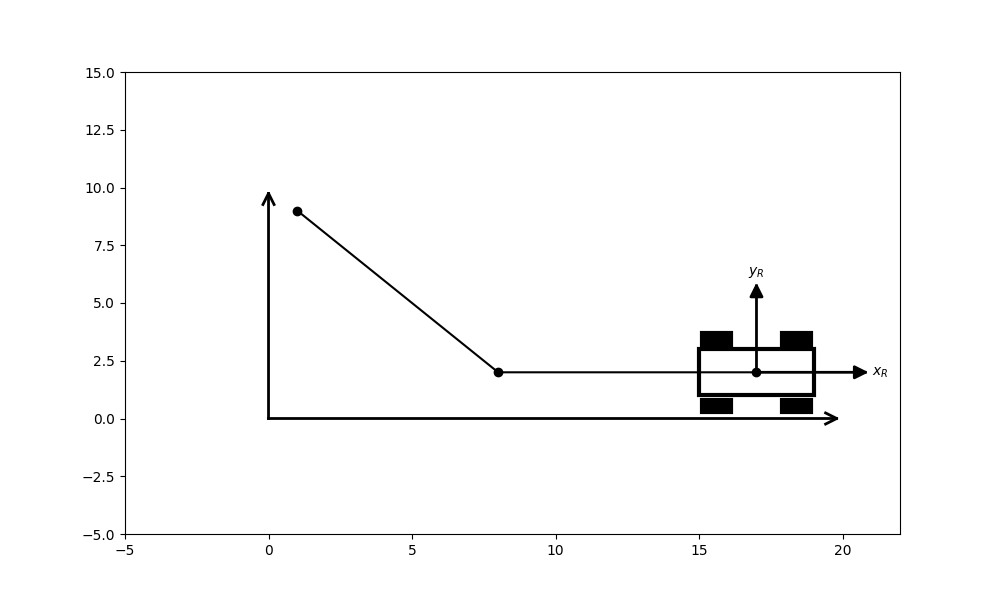

In [7]:
%matplotlib widget
from mobile_robot_mecanum_wheel import *

fig = plt.figure(figsize=(10, 6))

points = [[1.0, 9.0], [8.0, 2.0], [17.0, 2.0]]


anim = macanum_rob_animation(fig, points,rob=True)

anim.save('mecanum_rob.gif')